# **Lab #6. Interactive Visualization**

*This material is prepared by Yugyeong Jung*

## Learning objectives

In our previous lecture, we learned three kinds of manipulation: navigation, selection, and change. In Lab #6, we will implement them with   **Plotly's interactive visualization features**. You will probably feel that data visualization is more exciting than ever before!

![picture](https://drive.google.com/uc?export=view&id=1AE38t9fRloigIB40gVFlbgMSspijkOlu)

# **From Static to Interactive Visualization**

## When do we need interactive viz?

Before leaving for work/school, you need to decide whether you should walk or take an taxi. You check Google Maps (or Naver Maps) to see how much traffic there is on your route, and you see there's a lot. You decide to take an taxi to avoid the hassle of driving in a messy traffic situation. In the app, you can do various interactions such as zooming in/out and selecting specific areas.

All these interactions are based on an **interactive data visualization tool**. By exploring geographical data using these interactions, you can get useful information for decision making.

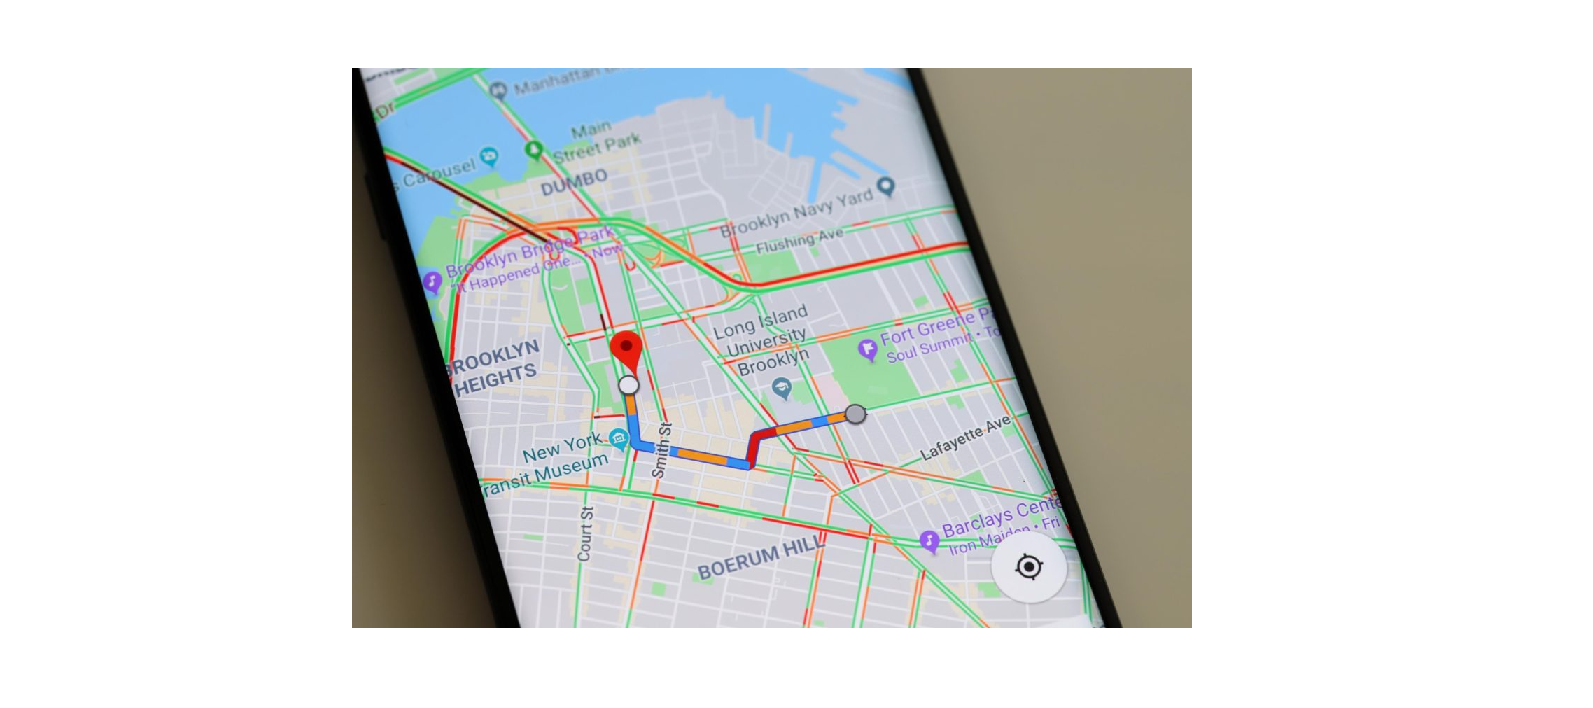

## Static vs. Interactive viz



 The definition of interactive is something that involves communication between two or more things or people that work together. Therefore, interactive visualizations are graphical representations of analyzed data (static or dynamic) that can **react and respond to user actions in the moment**.

You can easily understand interactive visualization with the figure below.

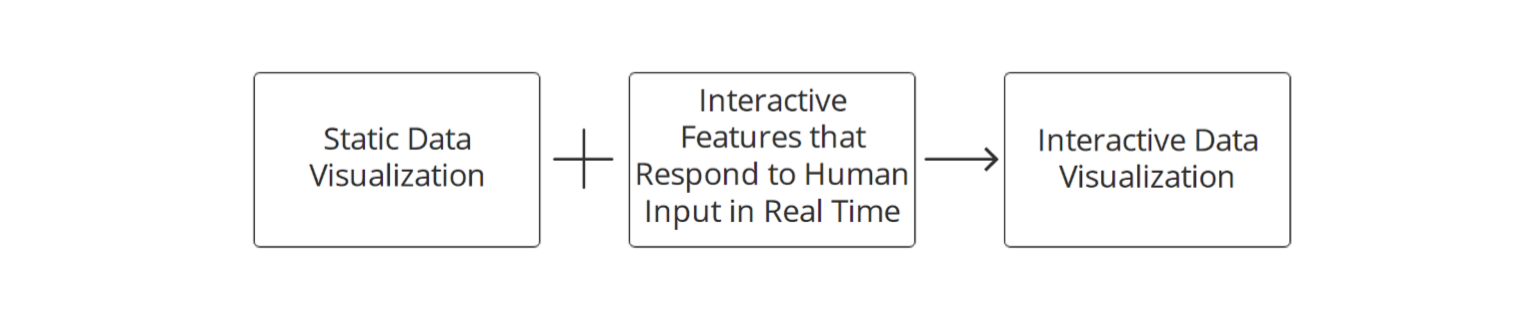

The table below shows the difference between traditional static visualization and interactive visualization. I wish that you clearly understand the advantages of interactive visualization.

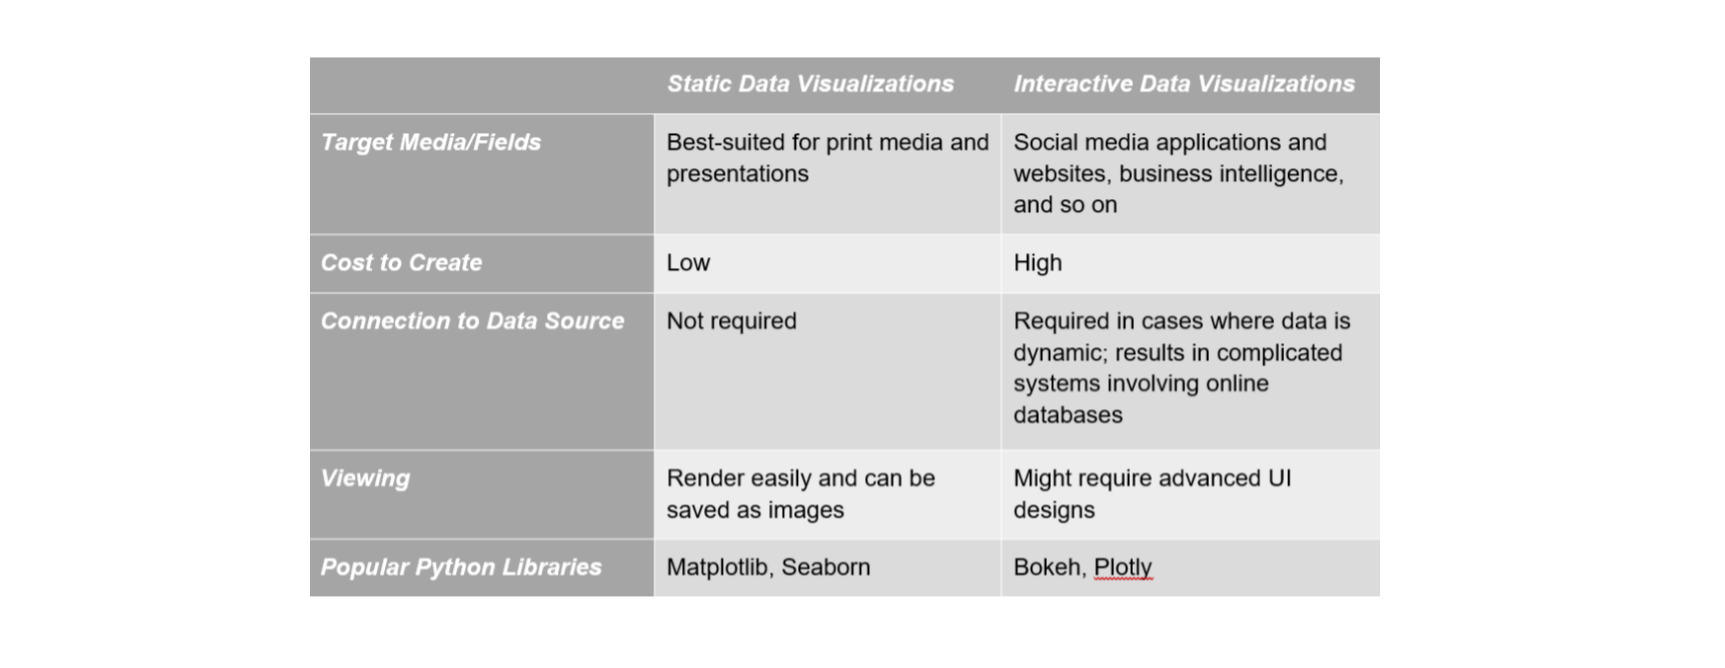

Additionally, interactive data visualizations have the following characteristics:


*   They are **easier to explore** as they allow you to interact with data by changing colors, parameters, and plots. 
* They enable access to **real-time data** and the insights they provide. This allows for the efficient and quick analysis of **trends**. 
* They are **easier to comprehend**, thereby allowing organizations to make better data-based decisions.



#**Navigate**

## Dataset: Gapminder - Co2 dataset

Let's get started with our visualizations! You already met the gapminder dataset in the last lab. This dataset looks similar to the previous one, but it is slightily differnt; data on co2 emission of each country is added to the gapminder dataset. You can download them in google classroom (gapminder_co2.csv).


* This dataset are the combined version of two seperate data sources, you can download raw data in the reference section.

![picture](https://drive.google.com/uc?export=view&id=118DkamxcGqDcEhAuFMv93FrxauTaARhq)

You might think of a scatter plot that describes the relationship between GDP and Co2 emission. How can we add **interactive** elements to it? 

Mount a Google Drive by executing code. It will ask you to enter an authorization code. Please click the URL to give streaming permission, which will give you an authorization code. Copy that code and paste it in the console pane of this section (after pasting, press 'Enter').

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Import the pandas and numpy libraries: 

In [2]:
import pandas as pd
import numpy as np

2. Import gapminder_co2.csv dataset

In [3]:
gapminder_co2_df=pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/gapminder_co2.csv')
gapminder_co2_df.head()

,country,region,year,co2,gdp,population,child_mortality,life
0,Afghanistan,South Asia,1964,0.0863,1182,10474903,339.7,33.639
1,Afghanistan,South Asia,1965,0.1010,1182,10697983,334.1,34.152
2,Afghanistan,South Asia,1966,0.1080,1168,10927724,328.7,34.662
3,Afghanistan,South Asia,1967,0.1240,1173,11163656,323.3,35.170
4,Afghanistan,South Asia,1968,0.1160,1187,11411022,318.1,35.674


## Zooming and Panning

Zooming and panning are the representative examples of navigation. If you use other visualization libraries, you would have to manually implement them by yourself. Luckily, plot.ly provides zooming and panning featuers with no pain. Let's start with a simple histogram that visualizes the distribution of life expectancy.

In [4]:
import plotly.express as px
fig=px.histogram(gapminder_co2_df, x='life')
fig.update_layout(title='Distribution of life expectancy', width=800, height=400)
fig.show()

Think about you are only interested in the on life expectancy under 50 years and over 20 years old. You may want to see in detail only the data that falls within that range. You can do this just by brusing the area you want. Also, if you hover your mouse over the plot, you can see a menu bar and there is 'panning' icon. Then you can freely move the plot with your mouse.

![picture](https://drive.google.com/uc?export=view&id=1VBVKBam9Ru091rrgt4RxkDwLgcWITnQ9)

## Navigate with Range Slider

![picture](https://drive.google.com/uc?export=view&id=1rEfFMDyi0dB2kdPehi6-B-4axYGfSe5b)

Not only for brusing plots, you can also zoom and navigate your plot with **range slider**. By moving the range slider, you can easily explore your data of predefined range. Like this figure, you can navigate the **focused part of data** in original plot and **context of data** on the slider. 

Plotly makes it very easy to implement a range slider. If you want to learn more about to make it with Plotly, visit this site: https://plotly.com/python/range-slider/

In [5]:
import plotly.graph_objects as go
fig = go.Figure()
#Make a basic line plot which shows the trend of Co2 emissions
fig.add_trace(go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].year, 
                         y=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].co2,
                         mode='lines+markers'))
fig.update_layout(
    title='Population Change Over 1964-2013',
    xaxis_title='Year',
    yaxis_title='Co2',

    #This is the part of adding range slider
    xaxis=
        dict(
        rangeslider=
        dict(
        #Whether the range slider will be shown or not
        visible=True
        ),
        #Define the type of x-axis as date
        type="date"
        )
)

fig.show()

##Mini-Exercise #1

(1) We will make range slider that can be shared with multiple line plots.

* Make multiple line plots that show the trend of Co2 over time. You need to make three line plots: United Kingdom, Turkey, and France.
* Add a range slider below the figure. As you move the slider, all three lines need to be zoomed in/out at the same time. 

In [6]:
fig = go.Figure()
#Make a basic line plot which shows the trend of Co2 emissions
fig.add_trace(go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].year, 
                         y=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].co2,
                         mode='lines+markers',
                         name='UK'))
fig.add_trace(go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='Turkey'].year, 
                         y=gapminder_co2_df.loc[gapminder_co2_df['country']=='Turkey'].co2,
                         mode='lines+markers',
                         name='Turkey'))
fig.add_trace(go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='France'].year, 
                         y=gapminder_co2_df.loc[gapminder_co2_df['country']=='France'].co2,
                         mode='lines+markers',
                         name='France'))
fig.update_layout(
    title='Population Change Over 1964-2013',
    xaxis_title='Year',
    yaxis_title='Co2',
    #This is the part of adding range slider
    xaxis=
        dict(
        rangeslider=
        dict(
        #Whether the range slider will be shown or not
        visible=True
        ),
        #Define the type of x-axis as date
        type="date"
        )
)

fig.show()

Submission link: https://docs.google.com/document/d/1PwYtoNY8iNsbihueB2pZYkW7AxlKQe5AMyHlqVwAyiM/edit?usp=sharing

(2) We learned two methods to represent multiple plots: **superimpose** and **juxtapose**, and you have already implemented the superimpose method. Both are useful for visualizing multiplt plots at the same time. However, it depends on the purposes of your visualization. Assume that you want to zoom in the specifc time range of data and compare Co2 emission values across different nations in the same y-axis. Which one (superimpose vs. juxtapose) is appropriate? Why do you think so?

*Hints - we discussed two different tasks: local vs. global tasks. Local tasks include getting min/max, whereas global tasks include getting slope, discrimination.*

Write your opinion: Superimpose is better for comparing Co2 in the same y-axis.

![picture](https://drive.google.com/uc?export=view&id=17XGZS57FM9ZGLXgorTgm3xkQBq58jQGu)

# **Select**

## Hovering

Hovering is to put your cursor on the specific point of computer screen. You can select a point in plots and observe them with hovering. Plotly provides hovering as a default feature of a plot. Let's make three line plots that represent the trend of population in United Kingdom, Turkey, and France.

In [7]:
fig = go.Figure(data=[#Line plot can be made with go.Scatter() function: Put 'lines+markers' value in **mode** parameter
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].population,
                                 mode='lines+markers',
                                 name='United Kingdom'),
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='Turkey'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='Turkey'].population,
                                 mode='lines+markers',
                                 name='Turkey'),
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='France'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='France'].population,
                                 mode='lines+markers',
                                 name='France')
                      ])
#Update the title of the plot and the titles of x and y axis
fig.update_layout(title='Population Change Over 1964-2013',
                  xaxis_title='Year',
                  yaxis_title='Population')

fig.show()

If you hover your mouse on the plot, you can see the information of each point such as: [(1978, 42.2062M), Turkey]. However, in 1994, it seems difficult to check the information of three countries because they are overlapped. Also, someone can felt difficult in interpreting the informations in the tooltips. We can make it easier to see by formatting the tooltip using "hovertemplate." If you wish to learn more please visit https://plotly.com/python/hover-text-and-formatting/ 

In [8]:
fig = go.Figure(data=[
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].population,
                                 mode='lines+markers',
                                 name='United Kingdom',
                                 #Let's customize tooltip (hovering information) using **hovertemplate** parameter
                                 #If you want to know more information, visit this site: https://plotly.com/python/hover-text-and-formatting/
                                 hovertemplate='Population: %{y}'+'<br>Year: %{x}'),
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='Turkey'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='Turkey'].population,
                                 mode='lines+markers',
                                 name='Turkey',
                                 hovertemplate='Population: %{y}'+'<br>Year: %{x}'),
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='France'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='France'].population,
                                 mode='lines+markers',
                                 name='France',
                                 hovertemplate='Population: %{y}'+'<br>Year: %{x}')
                      ])

fig.update_layout(title='Population Change Over 1964-2013',
                  xaxis_title='Year',
                  yaxis_title='Population',
                  #Multiple hoverlabels will appear for multiple points along with x-axis
                  #There are other options: 'y' or 'closest'
                  hovermode='x')

fig.show()

If you hover the mouse on the specific point of x-axis, you can see that three kinds of tooltips (United Kingdom, Turkey, France) appear at the same time. Although three points are overlapped like year 1994, we can easily check the information of them. In addition, it seems easy to understand what the numbers in the tooltips mean. 

## Select with Buttons

In this example, we will first draw a grouped bar plot that shows average GDP according to years (1970, 1980, 1990, 2000, and 2010) and region. Then we will add a set of buttons that can select a specific region. If we click a button, the bars corresponding to the selected region will be highlighted. Let's learn how we can implement it together.

In [9]:
#Filter the data of five years and calculate the average GDP according to region and year
df=gapminder_co2_df.loc[(gapminder_co2_df['year']==1970)|
                        (gapminder_co2_df['year']==1980)|
                        (gapminder_co2_df['year']==1990)|
                        (gapminder_co2_df['year']==2000)|
                        (gapminder_co2_df['year']==2010)]

df = df.groupby(['region', 'year']).mean(numeric_only = True).reset_index()
df.head()

,region,year,co2,gdp,population,child_mortality,life
0,America,1970,3.626427,7915.433333,1.696662e+07,97.171333,61.858933
1,America,1980,4.835000,10077.766667,2.020773e+07,66.672000,65.582867
2,America,1990,3.602933,10398.166667,2.372323e+07,44.680000,68.873467
3,America,2000,4.046167,12172.933333,2.734504e+07,29.573333,71.380033
4,America,2010,4.711833,14548.000000,3.062485e+07,25.460000,73.183933


We will draw a grouped bar plot as follows:

In [10]:
import plotly.graph_objects as go

#Make empty Figure object
fig=go.Figure()

#Add traces one by one
fig.add_traces(go.Bar(name='South Asia', x=df.year, y=df[df.region=='South Asia'].gdp, marker_color='#66C5CC'))
fig.add_traces(go.Bar(name='Sub-Saharan Africa', x=df.year, y=df[df.region=='Sub-Saharan Africa'].gdp, marker_color='#F6CF71'))
fig.add_traces(go.Bar(name='America', x=df.year, y=df[df.region=='America'].gdp, marker_color='#F89C74'))
fig.add_traces(go.Bar(name='East Asia & Pacific', x=df.year, y=df[df.region=='East Asia & Pacific'].gdp, marker_color='#DCB0F2'))
fig.add_traces(go.Bar(name='Europe & Central Asia', x=df.year, y=df[df.region=='Europe & Central Asia'].gdp, marker_color='#87C55F'))
fig.add_traces(go.Bar(name='Middle East & North Africa', x=df.year, y=df[df.region=='Middle East & North Africa'].gdp, marker_color='#9EB9F3'))

#Update background color and title
fig.update_layout(plot_bgcolor = 'white', title = 'Average GDP According to Region and Year')

fig.show()

Click the legend part. Whenever you click each region, the corresponding bars will be disappeared. But what we want to make is not to get rid of the bar, but to emphasize it using colors. Let's add buttons for that feature.

In [11]:
#each element in the list correspond to bars with 1970, 1980, 1990, 2000, and 2010
lightgray = ['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']
lightcoral = ['LightCoral', 'LightCoral', 'LightCoral', 'LightCoral', 'LightCoral']

# rows correspond to region, columns correspond to each year
# [['LightCoral', 'LightCoral', 'LightCoral', 'LightCoral', 'LightCoral'],
#  ['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray'],
#  ['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray'],
#  ['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray'],
#  ['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray'],
#  ['lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray']]

fig.update_layout(
  updatemenus = list([
      dict(type="buttons",
          buttons=list([
              dict(label = 'South Asia',
                  method = 'update',
                  #first element (South Asia) is highlighted
                  #each element in the list correspond to bars of each region
                  args = [{'marker.color': [lightcoral, lightgray, lightgray, lightgray, lightgray, lightgray]},
                          {'title': 'South Asia Highlighted'}]),
              dict(label = 'Sub-Saharan Africa',
                  method = 'update',
                  #second element (Sub-Saharan Africa) is highlighted
                  args = [{'marker.color': [lightgray, lightcoral, lightgray, lightgray, lightgray, lightgray]},
                          {'title': 'Sub-Saharan Africa Highlighted'}]),
              dict(label = 'America',
                  method = 'update',
                  #third element (America) is highlighted
                  args = [{'marker.color': [lightgray, lightgray, lightcoral, lightgray, lightgray, lightgray]},
                          {'title': 'America Highlighted'}]),
              dict(label = 'East Asia & Pacific',
                  method = 'update',
                  #forth element (East Asia & Pacific) is highlighted
                  args = [{'marker.color': [lightgray, lightgray, lightgray, lightcoral, lightgray, lightgray]},
                          {'title': 'East Asia & Pacific Highlighted'}]),
              dict(label = 'Europe & Central Asia',
                  method = 'update',
                  #fifth element (Europe & Central Asia) is highlighted
                  args = [{'marker.color': [lightgray, lightgray, lightgray, lightgray, lightcoral, lightgray]},
                          {'title': 'Europe & Central Asia Highlighted'}]),
              dict(label = 'Middle East & North Africa',
                  method = 'update',
                  #fifth element (Middle East & North Africa) is highlighted
                  args = [{'marker.color': [lightgray, lightgray, lightgray, lightgray, lightgray, lightcoral]},
                          {'title': 'Middle East & North Africa Highlighted'}]),
              dict(label = 'Reset',
                  method = 'update',
                  #reset to original colors
                  args = [{'marker.color': ['#66C5CC', '#F6CF71', '#F89C74', '#DCB0F2', '#87C55F', '#9EB9F3']},
                          {'title': 'Average GDP According to Region and Year'}]),
          ]),
      #Set the position of button
      x=1.035,
      #Sets the update menu's horizontal position anchor: ["left", "center" ,"right", "auto"]
      xanchor="left",
      y=0.63,
      #Sets the update menu's vertical position anchor : ["top", "middle", "bottom", "auto"]
      yanchor="top")
  ]),
)

fig.show()

If you click on a specific button, you will be able to more easily observe how GDP in the region changes over time (e.g., increasing or decreasing).
If you implement this feature using Dash, note that you can also make this using callback function!

What's the name of this technique? 
Answer: Focus+Context  
   * Show selected regions in greater detail (focus)
   * Preserve global view at reduced detail (context)
   * No occlusion (all information is visible simultaneously) 

Pointing out relevant information to a user is one application of focus+context techniques in information visualization. Here, we learn a method for doing this which uses selective blur to direct the user's attention. This method is based on the depth of field (DOF) effect used in photography and cinematography, and is therefore both familiar to users and perceptually effective. Because this method blurs objects based on their relevance rather than their distance, this technique is called Semantic Depth of Field (SDOF). For more details, please refer to this work: R. Kosara, S. Miksch, and H. Hauser, “Focus+Context Taken Literally,” IEEE Computer Graphics and Applications, 2002.

## Mini-Exercise #2



* Make a line plot for five countries: United Kingdom, Turkey, France, Thailand, and Italy. X-axis is year and y-axis is population. 
* Add five buttons corresponding to each country. When you click the button, specific line will be highlighted as follows: 
* Instead of using 'marker.color' argument, you can use 'opacity' argument. Like this: 'opacity': [1, 0.1, 0.1, 0.1, 0.1]

In [12]:
fig = go.Figure(data=[
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='United Kingdom'].population,
                                 mode='lines+markers',
                                 name='United Kingdom',
                                 hovertemplate='Population: %{y}'+'<br>Year: %{x}'),
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='Turkey'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='Turkey'].population,
                                 mode='lines+markers',
                                 name='Turkey',
                                 hovertemplate='Population: %{y}'+'<br>Year: %{x}'),
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='France'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='France'].population,
                                 mode='lines+markers',
                                 name='France',
                                 hovertemplate='Population: %{y}'+'<br>Year: %{x}'),
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='Thailand'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='Thailand'].population,
                                 mode='lines+markers',
                                 name='Thailand',
                                 hovertemplate='Population: %{y}'+'<br>Year: %{x}'),
                      go.Scatter(x=gapminder_co2_df.loc[gapminder_co2_df['country']=='Italy'].year, 
                                 y=gapminder_co2_df.loc[gapminder_co2_df['country']=='Italy'].population,
                                 mode='lines+markers',
                                 name='Italy',
                                 hovertemplate='Population: %{y}'+'<br>Year: %{x}'),
                      ])

fig.update_layout(title='Population Change Over 1964-2013',
                  xaxis_title='Year',
                  yaxis_title='Population',
                  hovermode='x')
fig.update_layout(
  updatemenus = list([
      dict(type="buttons",
          buttons=list([
              dict(label = 'UK',
                  method = 'update',
                  args = [{'opacity': [1, 0.1, 0.1, 0.1, 0.1]},
                          {'title': 'UK Highlighted'}]),
              dict(label = 'Turkey',
                  method = 'update',
                  args = [{'opacity': [0.1, 1, 0.1, 0.1, 0.1]},
                          {'title': 'Turkey Highlighted'}]),
              dict(label = 'France',
                  method = 'update',
                  args = [{'opacity': [0.1, 0.1, 1, 0.1, 0.1]},
                          {'title': 'France Highlighted'}]),
              dict(label = 'Thailand',
                  method = 'update',
                  args = [{'opacity': [0.1, 0.1, 0.1, 1, 0.1]},
                          {'title': 'Thailand Highlighted'}]),
              dict(label = 'Italy',
                  method = 'update',
                  args = [{'opacity': [0.1, 0.1, 0.1, 0.1, 1]},
                          {'title': 'Italy Highlighted'}]),
              dict(label = 'Reset',
                  method = 'update',
                  args = [{'opacity': [1, 1, 1, 1, 1]},
                          {'title': 'Average GDP According to Region and Year'}
                          ]),
          ]),
      #Set the position of button
      x=1.035,
      #Sets the update menu's horizontal position anchor: ["left", "center" ,"right", "auto"]
      xanchor="left",
      y=0.63,
      #Sets the update menu's vertical position anchor : ["top", "middle", "bottom", "auto"]
      yanchor="top")
  ]),
)

Submission link: https://docs.google.com/document/d/1YVIMr4FU4IIwiJ8xn-WNnOKfYrN1OecuyhBv5Ou4Xkc/edit?usp=sharing

# **Change**

##Basic Animation

We will learn a basic animation feature of plotly.express. Plotly makes it easy to implement animation functions. Let's start with a scatter plot that shows the relationship between gdp and co2.

In [13]:
import plotly.express as px
fig=px.scatter(gapminder_co2_df, x='gdp', y='co2', color='region')
fig.show()

We will first add an interactive slider in our plot. Slider is a user input mechanism for specifying numeric value from a range. It is a commonly-used user input used in interactive data visualization. It makes scatter plots over years and enables animated transition between years as indicated in the slider.

In [14]:
#You can also put the slider usint **animation_frame** feature to make the interactive plot!
#This code means that we will give animation effects over 'year'
figure=px.scatter(gapminder_co2_df, x='gdp', y='co2', 
                  color='region',
                  animation_frame='year')
figure.show()

##Animation with Multiple Views

Not only for making the animated transions in one plot, you can implement it with multiple plots. We will make 6 plots that are separated according to 'region', and make a slider that can provide animation to all of plots.

In [15]:
#Set the min and max range on x-axis
xmin, xmax = min(gapminder_co2_df.gdp), max(gapminder_co2_df.gdp)
#Set the min and max range on y-axis
ymin, ymax = min(gapminder_co2_df.co2), max(gapminder_co2_df.co2)

#You can divide scatter plot by region using **facet_col** parameter
#In one facetted plot, each point represnt each country, and you can seperate them with **animation_group** parameter
fig = px.scatter(gapminder_co2_df, 
                 x="gdp", y="co2", 
                 animation_frame="year", 
                 animation_group="country",
                 color="region", 
                 hover_name="country", 
                 facet_col="region", 
                 width=1579, height=400,
                 log_x=True, size_max=45, 
                 range_x=[xmin,xmax], range_y=[ymin,ymax])

fig.show()

# **Homework: Interactive Visualization with Mosquito Dataset**

Assume that you are a researcher who investigates the effects of mosquito in Seoul city. You have a mosquito indicator dataset from 2016 to 2019 (download it from KLMS). What you need to do is to explore the dataset and make interactive visualizations to introduce this dataset to your teammates!

* You can download original dataset in this link: https://www.kaggle.com/kukuroo3/mosquito-indicator-in-seoul-korea

![picture](https://drive.google.com/uc?export=view&id=1vLA7l0fpeBSqipy95Iqj-VUTolRa_VE5)

In [16]:
mosquito_df=pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/mosquito_Indicator.csv')
mosquito_df.head()

,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9


(1) Make grouped bar plots that represent the average value of mosquito indicators according to year and season. 

* Define each season depending on month: [Mar, Apr, May: Spring], [Jun, Jul, Aug: Summer], [Sep, Oct, Nov: Autumn], [Dec, Jan, Feb: Winter]

* You need to make the plot with defining y-axis as average mosquito-indicator value, x-axis as year, and legend as season.

* Add five buttons (1) Highlight Spring (2) Highlight Summer (3) Highlight Fall (4) Highlight Winter (5) Reset. For each highlight button, change the opacity value (highlighted one as 1 and non-highlighted one as 0.1)

* Use only data for 2016, 2017, and 2018

In [17]:
def get_season(month):
    if month in ['03', '04', '05']:
        return 'Spring'
    elif month in ['06', '07', '08']:
        return 'Summer'
    elif month in ['09', '10', '11']:
        return 'Autumn'
    else:
        return 'Winter'
mosquito_df['Year'] = [date.split('-')[0] for date in mosquito_df['date']]
mosquito_df['Month'] = [date.split('-')[1] for date in mosquito_df['date']]
mosquito_df['Season'] = mosquito_df['Month'].apply(get_season)

In [18]:
mosquito_df.drop(mosquito_df[mosquito_df['Year'] == '2019'].index, inplace=True)
group_mosquito_df = mosquito_df.groupby(['Year', 'Season']).mean().reset_index()

<ipython-input-18-c70f6f4909e7>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [19]:
group_mosquito_df

,Year,Season,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,2016,Autumn,312.110112,1.398876,15.280899,11.213483,20.242697
1,2016,Spring,352.603226,5.177419,19.558065,14.141935,25.687097
2,2016,Summer,484.839130,5.214130,25.968478,22.432609,30.397826
3,2016,Winter,2.836667,2.036667,1.123333,-2.850000,5.723333
4,2017,Autumn,239.147000,1.502000,15.581000,11.017000,20.773000
5,2017,Spring,123.689011,0.935165,13.368132,8.479121,19.362637
6,2017,Summer,656.192157,14.221569,25.423529,22.061765,29.540196
7,2017,Winter,2.897895,0.768421,-1.258947,-5.267368,3.300000
8,2018,Autumn,292.226667,4.126667,15.771667,11.826667,20.573333
9,2018,Spring,55.038947,4.229474,12.969474,8.315789,18.416842


In [20]:
fig = px.bar(group_mosquito_df, x='Year', y='mosquito_Indicator',
             color='Season', barmode='group',
             category_orders={'Season': ['Spring','Summer', 'Autumn', 'Winter']})
fig.update_layout(
  updatemenus = list([
      dict(type="buttons",
          buttons=list([
              dict(label = 'Highlight Spring',
                  method = 'update',
                  args = [{'opacity': [1, 0.1, 0.1, 0.1]},
                          {'title': 'Spring Highlighted'}]),
              dict(label = 'Highlight Summer',
                  method = 'update',
                  args = [{'opacity': [0.1, 1, 0.1, 0.1]},
                          {'title': 'Summer Highlighted'}]),
              dict(label = 'Highlight Autumn',
                  method = 'update',
                  args = [{'opacity': [0.1, 0.1, 1, 0.1]},
                          {'title': 'Autumn Highlighted'}]),
              dict(label = 'Highlight Winter',
                  method = 'update',
                  args = [{'opacity': [0.1, 0.1, 0.1, 1]},
                          {'title': 'Winter Highlighted'}]),
              dict(label = 'Reset',
                  method = 'update',
                  args = [{'opacity': [1, 1, 1, 1]},
                          {'title': 'Average Mosquito Indicator According to Year and Season'}
                          ]),
          ]),
      x=1.035,
      xanchor="left",
      y=0.63,
      yanchor="top")
  ]),
)
fig.show()

(2) Let's learn how to make multiple line plots with multiple y-axis ([link](https://plotly.com/python/multiple-axes/)). 
* In one plot, we will draw two lines to be overlapped: one is relationship between date and mosquito indicator, another is relationship between date and rain. Therefore, the plot will have two y-axis: mosquito indicator and rain (x-axis will be date).
* Add range slider that can navigate data along date.
* Add proper title, x-axis and y-axis name.
* We can also make two independent line plots (e.g., one with 'date vs. mosquito indicator' and another 'date vs. rain'). Compared to the separate plots, what are the advantages and disadvantages of showing them in one plot? - There is no correct answer here and feel free to write your opinion.

In [21]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=mosquito_df['date'], y=mosquito_df['mosquito_Indicator'], name="mosquito indicator")
)
fig.add_trace(
    go.Scatter(x=mosquito_df['date'], y=mosquito_df['rain(mm)'], name="rain(mm)"),
    secondary_y=True,
)
fig.update_xaxes(title_text="date")
fig.update_yaxes(title_text="mosquito indicator", secondary_y=False)
fig.update_yaxes(title_text="rain(mm)", secondary_y=True)
fig.update_layout(
    title='Mosquito Indicator and Rain according to Date',
    xaxis=
        dict(
        rangeslider=
        dict(
        #Whether the range slider will be shown or not
        visible=True
        ),
        #Define the type of x-axis as date
        type="date"
        )
)
fig.show()

**advantage**: Combining two independent line plots into one plot can save space on the page, making it easier to fit more information into a smaller area.

**disadvantage**: Combining two independent line plots into one plot can result in a cluttered graph that is hard to read.

## Grading Criteria

**Question #1 (50 points)**

* Define each season depending on month (5 points)
* Make grouped bar plot according to the predefined condition (20 points)
* Add five buttons that can interact with plot (20 points)
* Use only data for 2016, 2017, and 2018 (5 points)

**Question #2 (50 points)**

* Make multiple line plot according to the predefined condition (20 points)
* Add range slider that can interact with plot (10 points)
* Add proper x-axis, y-axis, title of the plot (10 points)
* Describe advantages and disadvantages of the plot (10 points) - If you write at least one, you can get 10 points

# References

* Plotly and Plotly-Express: https://medium.com/analytics-vidhya/interactive-data-visualization-became-much-easier-with-help-of-plotly-express-64c56e781b53
* Interactive Data Visualization with Python- Chapter 3 and 4
* Slider: Eick, S. G. (1994, November). Data visualization sliders. In Proceedings of the 7th annual ACM symposium on User interface software and technology (pp. 119-120).
* Plotly Buttons: https://plotly.com/python/custom-buttons/ 
* Dataset sources: 

    (1. gapminder) https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/gapminder.csv 

    (2. co2) https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/co2.csv 